# Análisis multivariado

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [3]:
df = palmerpenguins.load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Análisis de regresión múltiple

### Creando modelos

#### Modelo 1

In [4]:
model_1 = (smf.ols(formula='body_mass_g ~ bill_length_mm', data=df)).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     186.4
Date:                Mon, 13 May 2024   Prob (F-statistic):           3.81e-34
Time:                        19:32:02   Log-Likelihood:                -2697.0
No. Observations:                 342   AIC:                             5398.
Df Residuals:                     340   BIC:                             5406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        362.3067    283.345      1.279      0.202    -195.024     919.637
bill_length_mm    87.4153      6.402     13.654      0.000      74.823     100.008
==============================================================================
Omnibus:                        5.671   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.857
Skew:                          -0.211   Prob(JB):                       0.0882
Kurtosis:                       2.597   Cond. No.                         359.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [5]:
model_2 = (smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm', data=df)).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     150.8
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.40e-47
Time:                        19:32:02   Log-Likelihood:                -2662.9
No. Observations:                 342   AIC:                             5332.
Df Residuals:                     339   BIC:                             5343.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3343.1359    429.912      7.776      0.000    2497.504    4188.768
bill_length_mm    75.2808      5.971     12.608      0.000      63.537      87.025
bill_depth_mm   -142.7226     16.507     -8.646      0.000    -175.191    -110.254
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.019
Skew:                           0.001   Prob(JB):                        0.364
Kurtosis:                       2.624   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [6]:
model_3 = (smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm', data=df)).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Mon, 13 May 2024   Prob (F-statistic):          8.19e-105
Time:                        19:32:02   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6424.7647    561.469    -11.443      0.000   -7529.179   -5320.351
bill_length_mm        4.1618      5.329      0.781      0.435      -6.321      14.644
bill_depth_mm        20.0495     13.694      1.464      0.144      -6.887      46.986
flipper_length_mm    50.2692      2.477     20.293      0.000      45.397      55.142
==============================================================================
Omnibus:                        5.263   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.129
Skew:                           0.298   Prob(JB):                       0.0770
Kurtosis:                       3.065   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [7]:
model_4 = (smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)', data=df)).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 13 May 2024   Prob (F-statistic):          6.28e-122
Time:                        19:32:02   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [8]:
model_5 = (smf.ols(formula='body_mass_g ~ flipper_length_mm', data=df)).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Mon, 13 May 2024   Prob (F-statistic):          4.37e-107
Time:                        19:32:03   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.815    -18.903      0.000   -6382.358   -5179.305
flipper_length_mm    49.6856      1.518     32.722      0.000      46.699      52.672
==============================================================================
Omnibus:                        5.634   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.585
Skew:                           0.313   Prob(JB):                       0.0613
Kurtosis:                       3.019   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model_5 = (smf.ols(formula='body_mass_g ~ flipper_length_mm + C(sex)', data=df)).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.53e-118
Time:                        19:32:03   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualización del análisis de regresión múltiple

In [10]:
df_filled = df.fillna(value={'body_mass_g': df.body_mass_g.mean(), 'species': 'Unknown', 'sex': 'Unknown'})
df_filled

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.000000,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.000000,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.000000,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,4201.754386,Unknown,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.000000,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.000000,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.000000,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.000000,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.000000,male,2009


In [11]:
print("Longitud de la columna 'actual_value':", len(df_filled.body_mass_g))
print("Longitud de la columna 'species':", len(df_filled.species))
print("Longitud de la columna 'sex':", len(df_filled.sex))

# Obtener la longitud de las predicciones de los modelos 1 a 5
model_lengths = [
    len(model_1.predict()),
    len(model_2.predict()),
    len(model_3.predict()),
    len(model_4.predict()),
    len(model_5.predict())
]
for i, length in enumerate(model_lengths, start=1):
    print(f"Longitud de la columna 'prediction_model_{i}':", length)

# Continúa con el código para construir el DataFrame models_result


Longitud de la columna 'actual_value': 344
Longitud de la columna 'species': 344
Longitud de la columna 'sex': 344
Longitud de la columna 'prediction_model_1': 342
Longitud de la columna 'prediction_model_2': 342
Longitud de la columna 'prediction_model_3': 342
Longitud de la columna 'prediction_model_4': 333
Longitud de la columna 'prediction_model_5': 333


In [12]:
# Obtener la longitud mínima de las predicciones de los modelos 4 y 5
min_length = min(len(model_4.predict()), len(model_5.predict()))

# Recortar las predicciones de los modelos 4 y 5 para que tengan la misma longitud
model_4_predictions = model_4.predict()[:min_length]
model_5_predictions = model_5.predict()[:min_length]

# Construir el DataFrame models_result
models_results = pd.DataFrame(
    {
        'actual_value': df_filled.body_mass_g[:min_length],  # Recortar también df_filled para que tenga la misma longitud
        'prediction_model_1': model_1.predict()[:min_length],
        'prediction_model_2': model_2.predict()[:min_length],
        'prediction_model_3': model_3.predict()[:min_length],
        'prediction_model_4': model_4_predictions,
        'prediction_model_5': model_5_predictions,
        'species': df_filled.species[:min_length],  # Recortar también df_filled para que tenga la misma longitud
        'sex': df_filled.sex[:min_length]  # Recortar también df_filled para que tenga la misma longitud
    }
)

# Verificar la longitud del DataFrame resultante
print("Longitud del DataFrame models_result:", len(models_results))

Longitud del DataFrame models_result: 333


### ECDFs

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


<Axes: ylabel='Proportion'>

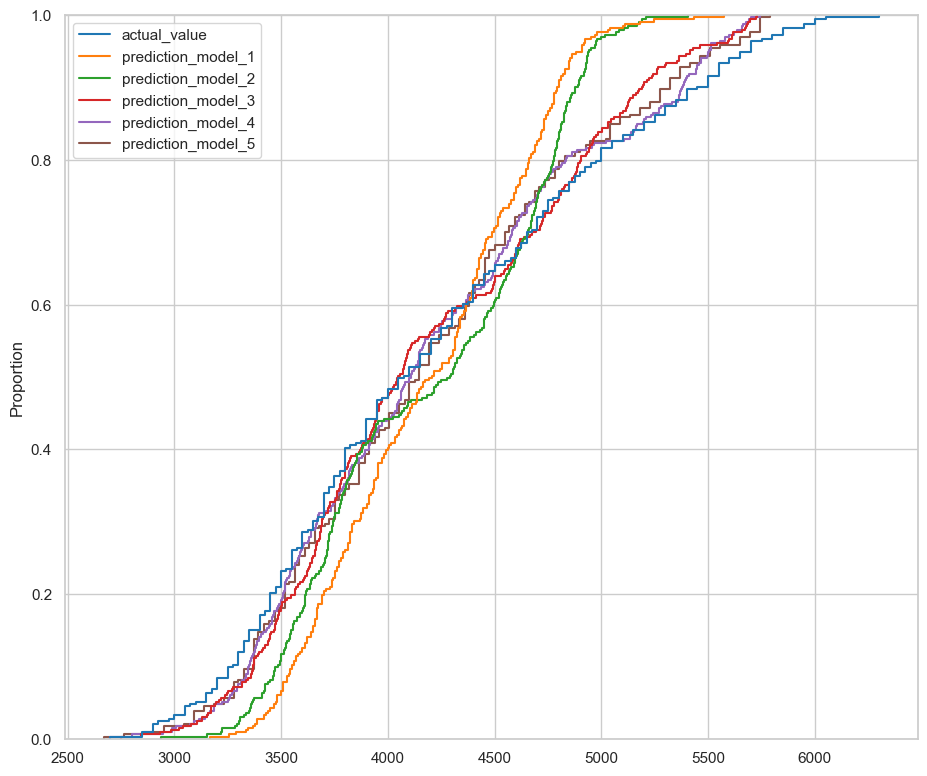

In [13]:
sns.ecdfplot(data=models_results)

c:\Users\usuario\Desktop\DS\10-analisis-exploratorio-de-datos\.venv\Lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


<Axes: ylabel='Proportion'>

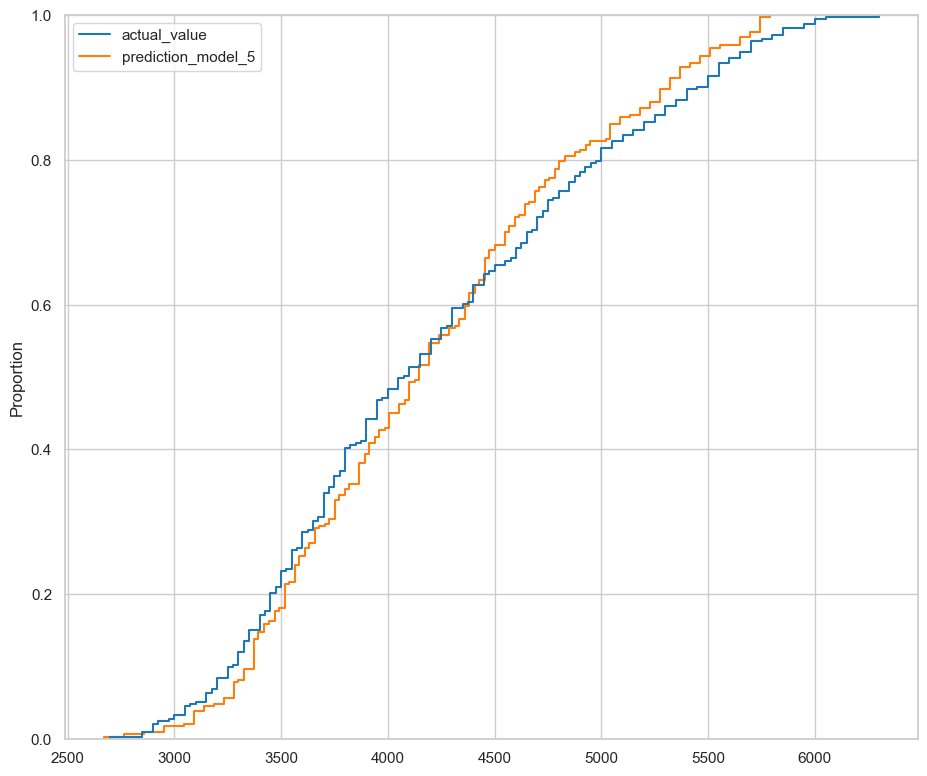

In [14]:
sns.ecdfplot(data=models_results.select_columns(['actual_value', 'prediction_model_5']))

### PDFs

<Axes: ylabel='Density'>

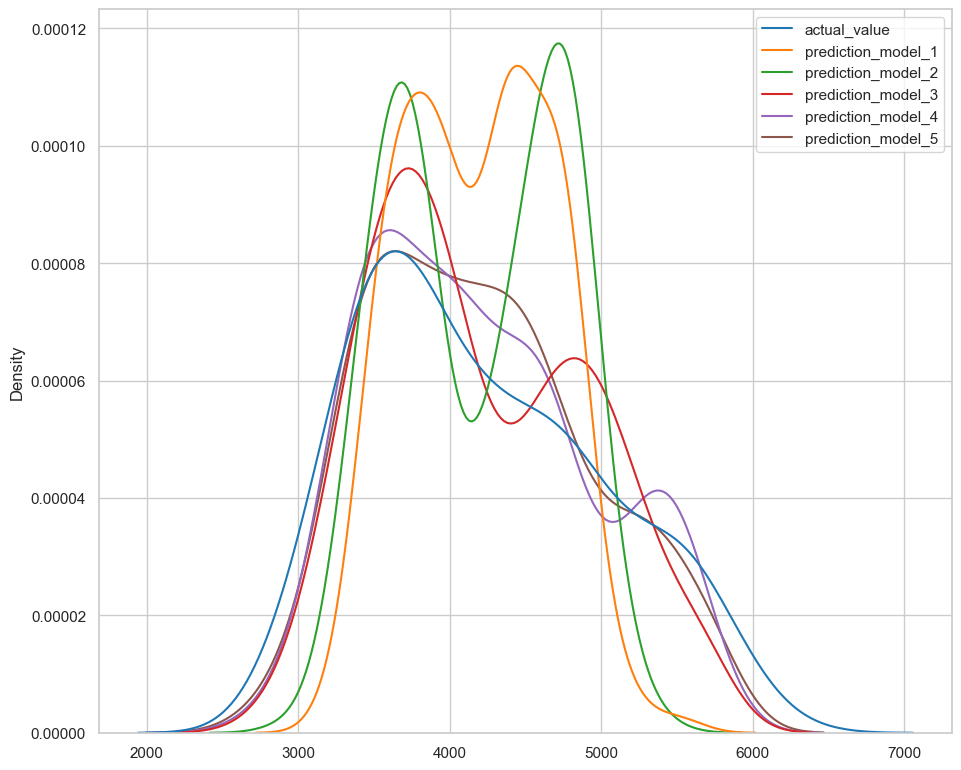

In [15]:
sns.kdeplot(data=models_results)

<Axes: ylabel='Density'>

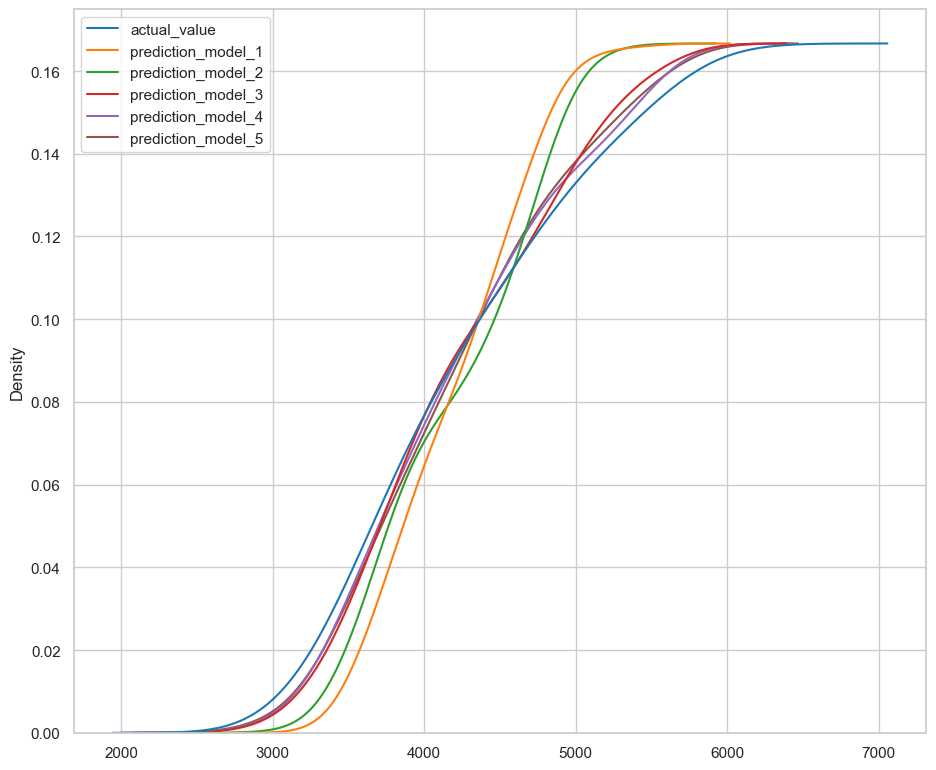

In [16]:
sns.kdeplot(data=models_results, cumulative=True)

### ¿Qué pudimos haber encontrado antes de hacer los modelos?

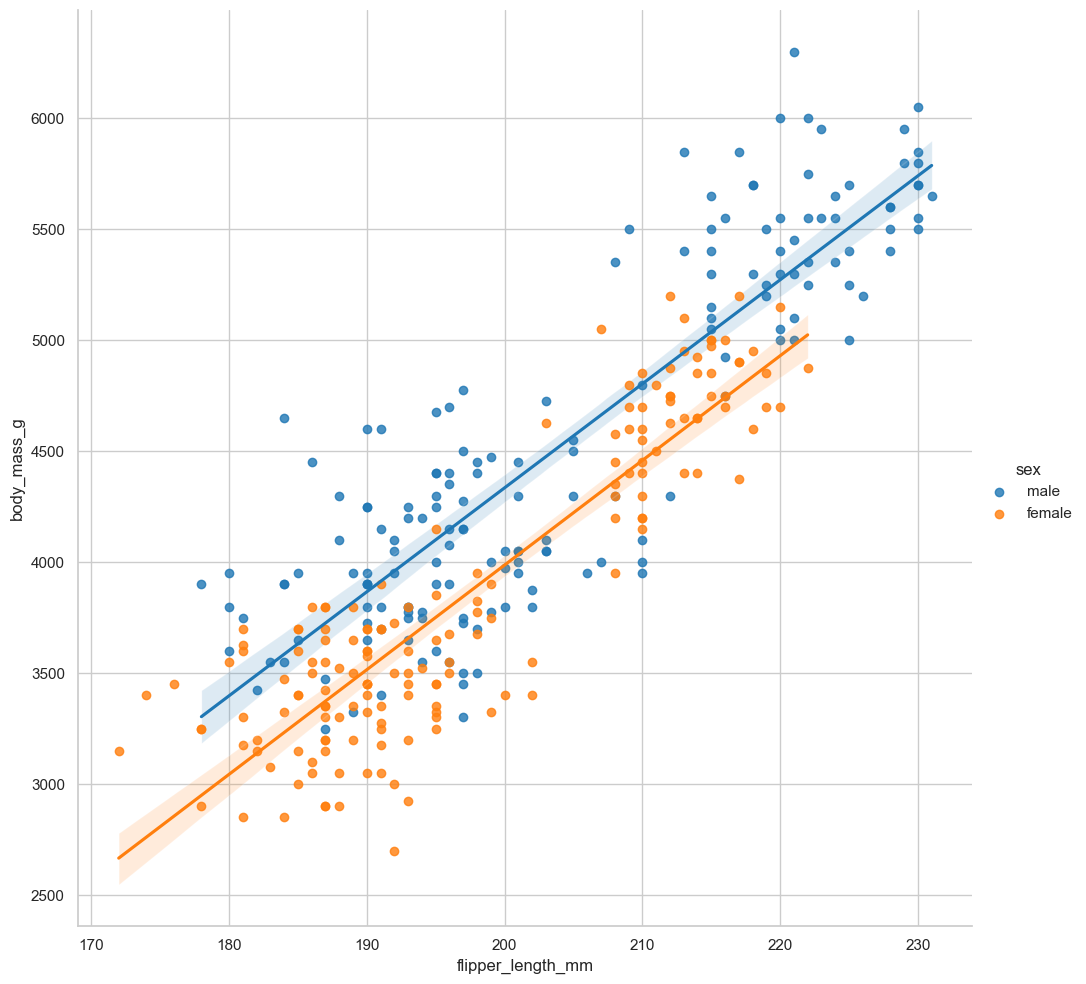

In [17]:
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='sex', height=10)
plt.show()

## Análisis de regresión logística

In [18]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [19]:
df = df.assign(numeric_sex=lambda df1 : df1.sex.replace(['female', 'male'], [0,1]))
df

C:\Users\usuario\AppData\Local\Temp\ipykernel_8084\1956319711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.assign(numeric_sex=lambda df1 : df1.sex.replace(['female', 'male'], [0,1]))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0.0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1.0


### ¿Podemos crear un modelo que nos ayude a definir si un pinguino es macho o hembra?

In [20]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 May 2024   Pseudo R-squ.:                  0.4793
Time:                        19:32:08   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [21]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [22]:
-1.5596 - (-1.0323)

-0.5273000000000001

### Exploración de nuestras variables categóricas

In [23]:
df.value_counts(['island', 'sex']).reset_index(name='count')

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


In [24]:
df.value_counts(['species','island', 'sex']).reset_index(name='count')

,species,island,sex,count
0,Gentoo,Biscoe,male,61
1,Gentoo,Biscoe,female,58
2,Chinstrap,Dream,female,34
3,Chinstrap,Dream,male,34
4,Adelie,Dream,male,28
5,Adelie,Dream,female,27
6,Adelie,Torgersen,female,24
7,Adelie,Torgersen,male,23
8,Adelie,Biscoe,female,22
9,Adelie,Biscoe,male,22


### ¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [25]:
df = (df.assign(is_adelie=lambda df2:df2.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0])))
df

C:\Users\usuario\AppData\Local\Temp\ipykernel_8084\2509958881.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = (df.assign(is_adelie=lambda df2:df2.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0])))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0.0,1
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1.0,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0.0,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1.0,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1.0,0


In [26]:
model_is_adelie = smf.logit(
    formula='is_adelie  ~ flipper_length_mm + C(sex) ',
    data = df 
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [27]:
# Obtener la longitud mínima entre las predicciones y el DataFrame df
min_length = min(len(df), len(model_is_adelie.predict().round()))

# Construir el DataFrame is_adelie_predictions
is_adelie_predictions = pd.DataFrame(
    {
        'actual_adelie': df.is_adelie[:min_length],
        'predicted_values': model_is_adelie.predict().round()[:min_length]
    }
)

# Verificar la longitud del DataFrame resultante
print("Longitud del DataFrame is_adelie_predictions:", len(is_adelie_predictions))

Longitud del DataFrame is_adelie_predictions: 333


In [28]:
is_adelie_predictions.value_counts(['actual_adelie', 'predicted_values']).reset_index(name='count')

,actual_adelie,predicted_values,count
0,0,0.0,145
1,1,1.0,129
2,0,1.0,36
3,1,0.0,23


In [29]:
print(sklearn.metrics.confusion_matrix(
    is_adelie_predictions.actual_adelie,
    is_adelie_predictions.predicted_values
))

sklearn.metrics.accuracy_score(
    is_adelie_predictions.actual_adelie,
    is_adelie_predictions.predicted_values
)

[[145  36]
 [ 23 129]]


0.8228228228228228

## Paradoja de Simpson

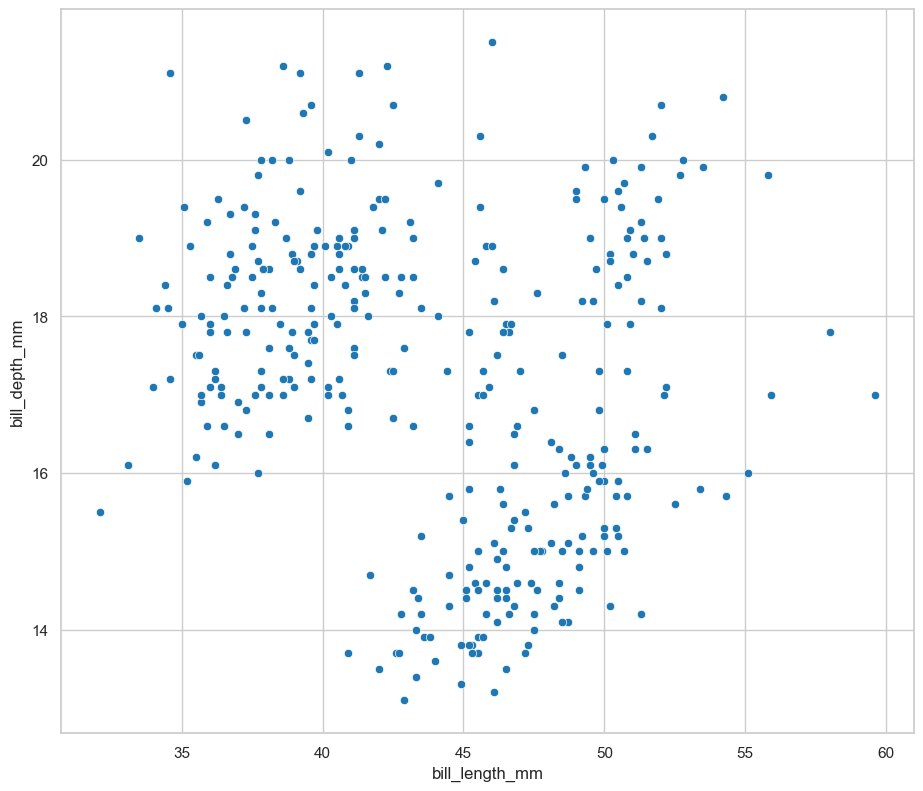

In [30]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm')
plt.show()

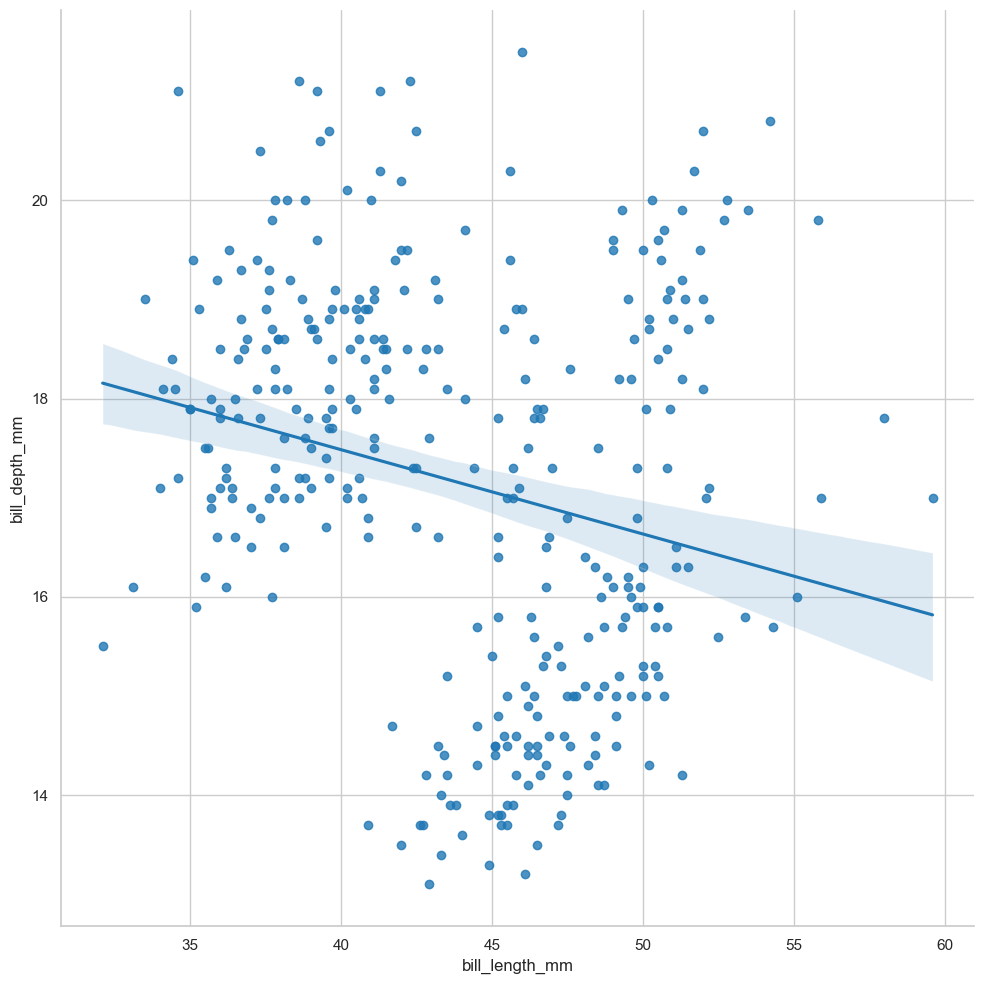

In [31]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', height=10)
plt.show()

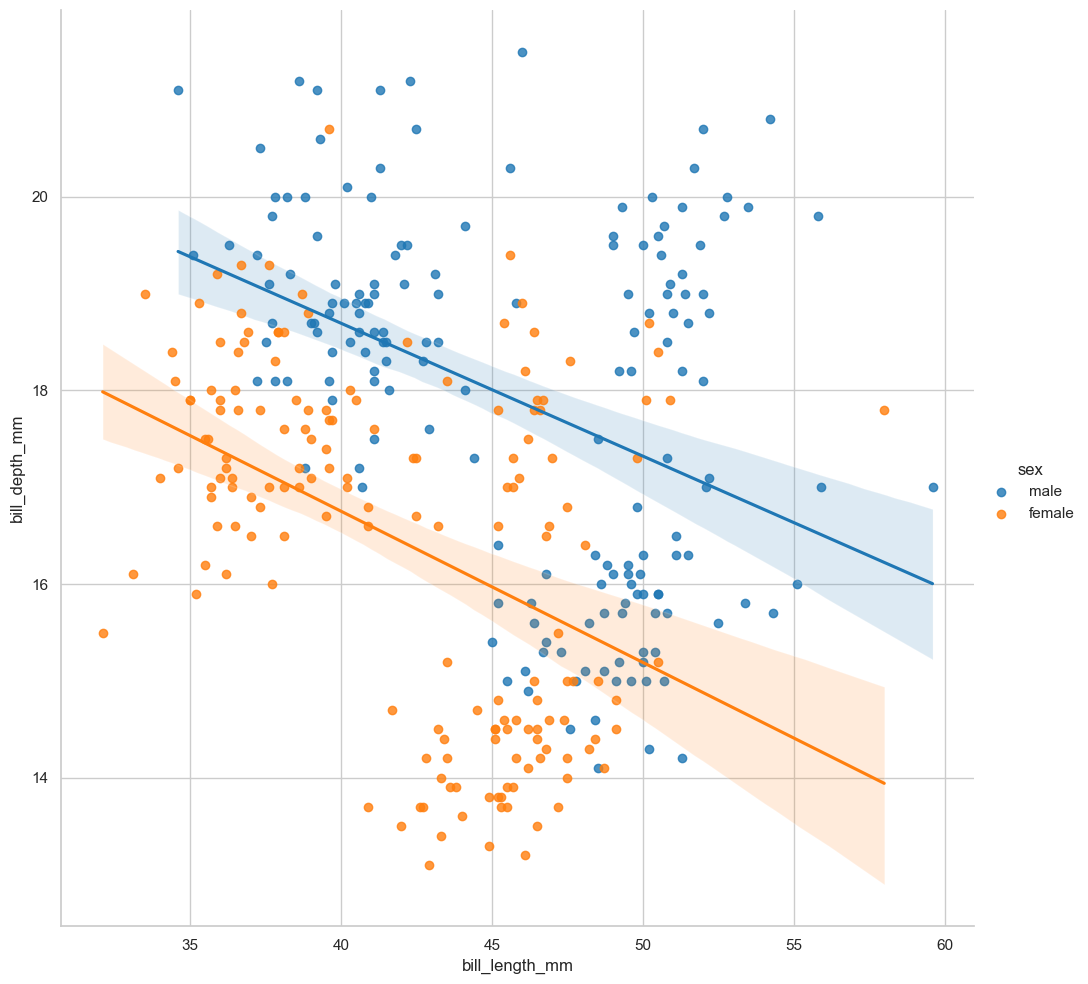

In [32]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex' ,height=10)
plt.show()

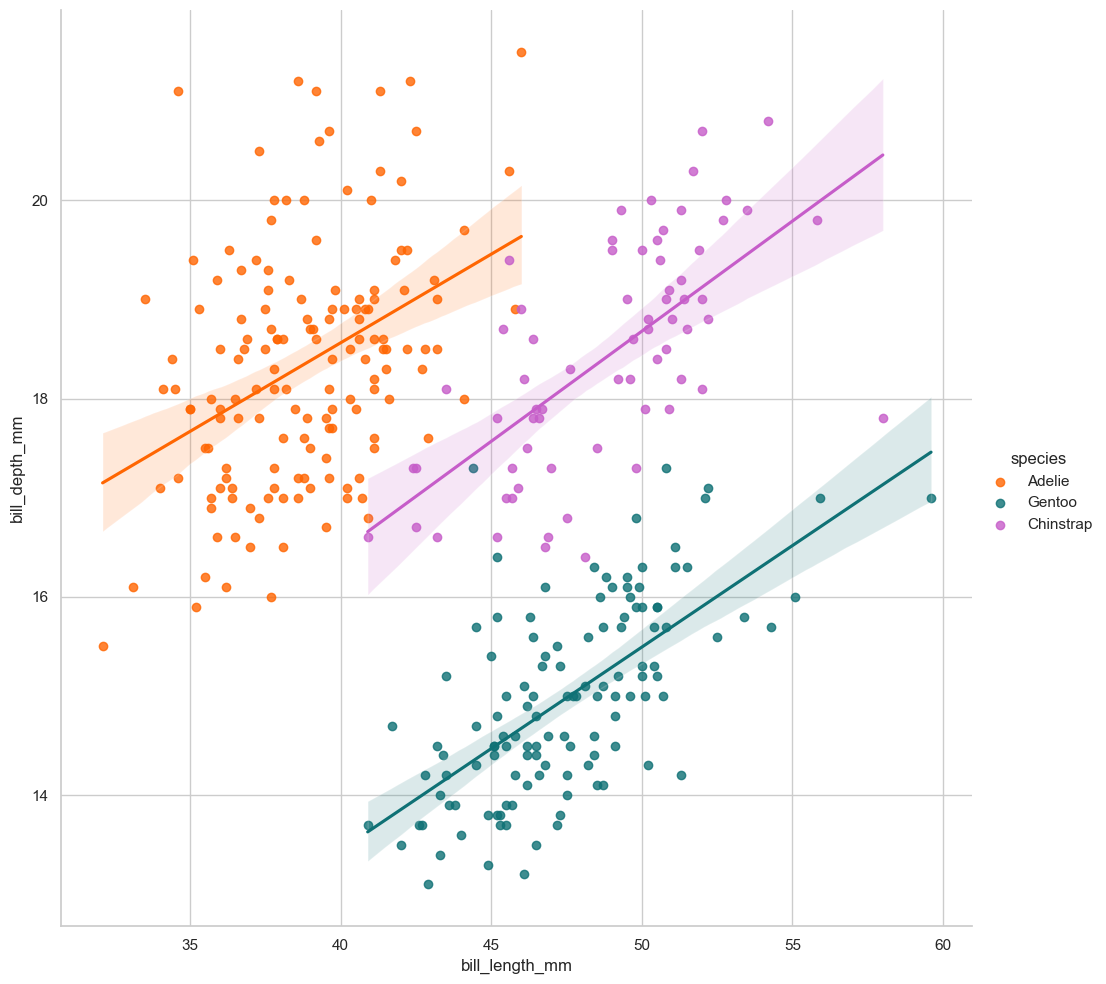

In [33]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', height=10, palette=penguin_color)
plt.show()

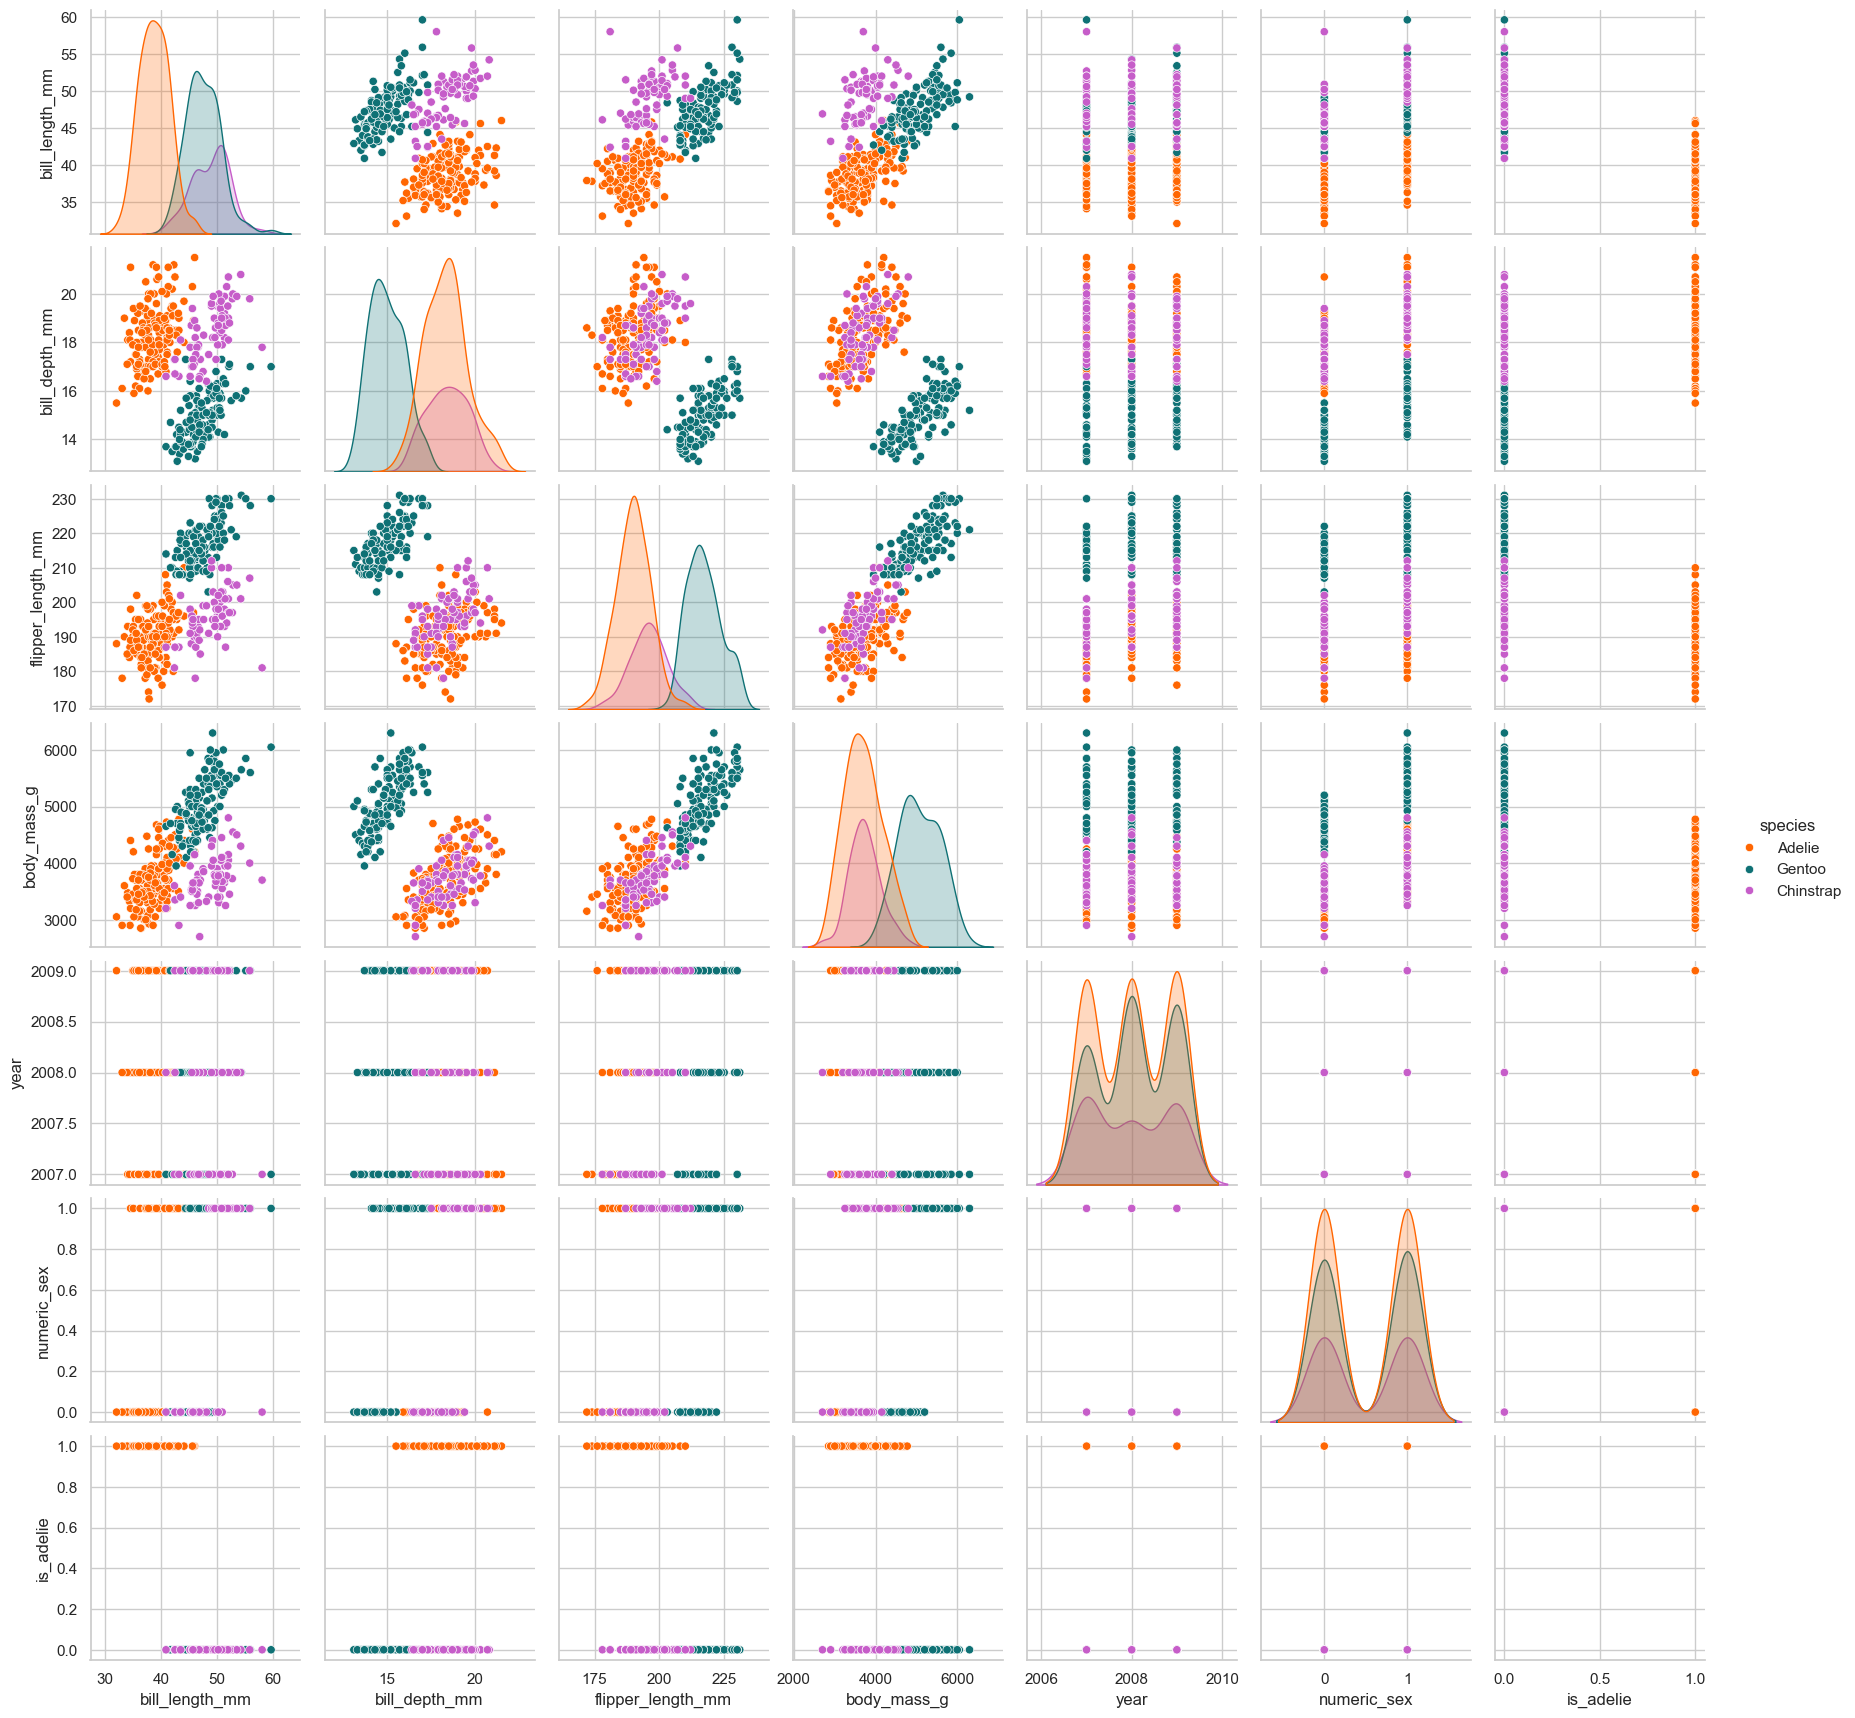

In [34]:
sns.pairplot(data=df, hue='species', palette=penguin_color)
plt.show()